## BIOINFORMATICS THESIS: MULTIMODAL NEURAL NETWORK

In [4]:
import pandas as pd 
import numpy as np
import os
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict, OrderedDict
import pickle

import sqlite3
from sqlalchemy import create_engine

device = 'cuda' if torch.cuda.is_available() else 'cpu'

from BIOINF_tesi.data_pipe import CELL_LINES, TASKS

In [5]:
from BIOINF_tesi.data_pipe import Load_Create_Task
from BIOINF_tesi.data_pipe import Build_DataLoader_Pipeline

In [6]:
from BIOINF_tesi.models import FFNN, CNN, CNN_LSTM
from BIOINF_tesi.models.utils import fit, Param_Search, Kfold_CV

In [17]:
with open ('results_dict.pickle', 'rb') as fin:
    results_dict = pickle.load(fin)
    results_dict = defaultdict(lambda: defaultdict(dict), results_dict)

In [6]:
from BIOINF_tesi.visual import print_content_results_dict

In [9]:
print_content_results_dict('EmbraceNetMultimodal_augm')

A549

active_E_vs_inactive_E
EmbraceNetMultimodal_augm

active_P_vs_inactive_P
EmbraceNetMultimodal_augm

active_E_vs_active_P
EmbraceNetMultimodal_augm

inactive_E_vs_inactive_P
EmbraceNetMultimodal_augm

active_EP_vs_inactive_rest
EmbraceNetMultimodal_augm


GM12878

active_E_vs_inactive_E
EmbraceNetMultimodal_augm

active_P_vs_inactive_P
EmbraceNetMultimodal_augm

active_E_vs_active_P
EmbraceNetMultimodal_augm

inactive_E_vs_inactive_P
EmbraceNetMultimodal_augm

active_EP_vs_inactive_rest
EmbraceNetMultimodal_augm


H1

active_E_vs_inactive_E
EmbraceNetMultimodal_augm

active_P_vs_inactive_P
EmbraceNetMultimodal_augm

active_E_vs_active_P
EmbraceNetMultimodal_augm

inactive_E_vs_inactive_P
EmbraceNetMultimodal_augm

active_EP_vs_inactive_rest
EmbraceNetMultimodal_augm


HEK293

active_E_vs_inactive_E
EmbraceNetMultimodal_augm

active_P_vs_inactive_P
EmbraceNetMultimodal_augm

active_E_vs_active_P
EmbraceNetMultimodal_augm

inactive_E_vs_inactive_P
EmbraceNetMultimodal_augm

active_E

---

In [16]:
from BIOINF_tesi.visual import get_average_AUPRC_df

df = get_average_AUPRC_df(models=['FFNN','CNN','ConcatNetMultimodal','EmbraceNetMultimodal',
                                 'EmbraceNetMultimodal_augm'])

for cell_line in df.keys():
    print(cell_line)
    display(df[cell_line])

A549


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
FFNN,0.1,0.242,0.682,0.513,0.209
CNN,0.06,0.194,0.658,0.584,0.147
ConcatNetMultimodal,0.1,0.165,0.572,0.592,0.175
EmbraceNetMultimodal,0.109,0.245,0.672,0.577,0.164
EmbraceNetMultimodal_augm,0.09,0.204,0.671,0.581,0.208


GM12878


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
FFNN,0.42,0.344,0.84,0.563,0.274
CNN,0.201,0.237,0.785,0.56,0.207
ConcatNetMultimodal,0.376,0.296,0.765,0.548,0.284
EmbraceNetMultimodal,0.343,0.347,0.717,0.56,0.23
EmbraceNetMultimodal_augm,0.269,0.27,0.675,0.564,0.318


H1


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
FFNN,0.147,0.226,0.53,0.575,0.265
CNN,0.084,0.202,0.339,0.6,0.19
ConcatNetMultimodal,0.064,0.295,0.426,0.582,0.228
EmbraceNetMultimodal,0.054,0.231,0.419,0.563,0.218
EmbraceNetMultimodal_augm,0.153,0.244,0.299,0.581,0.241


HEK293


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
FFNN,0.16,0.317,0.806,0.558,0.211
CNN,0.114,0.24,0.601,0.455,0.209
ConcatNetMultimodal,0.141,0.265,0.806,0.586,0.177
EmbraceNetMultimodal,0.116,0.292,0.626,0.563,0.203
EmbraceNetMultimodal_augm,0.125,0.235,0.806,0.578,0.223


HEPG2


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
FFNN,0.288,0.286,0.754,0.594,0.305
CNN,0.124,0.248,0.684,0.575,0.197
ConcatNetMultimodal,0.185,0.245,0.662,0.595,0.257
EmbraceNetMultimodal,0.292,0.355,0.753,0.574,0.174
EmbraceNetMultimodal_augm,0.255,0.36,0.744,0.569,0.248


K562


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
FFNN,0.172,0.342,0.788,0.589,0.253
CNN,0.096,0.242,0.65,0.564,0.169
ConcatNetMultimodal,0.14,0.339,0.659,0.592,0.23
EmbraceNetMultimodal,0.106,0.269,0.519,0.574,0.178
EmbraceNetMultimodal_augm,0.137,0.298,0.785,0.538,0.221


MCF7


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
FFNN,0.151,0.32,0.77,0.568,0.245
CNN,0.088,0.199,0.552,0.453,0.174
ConcatNetMultimodal,0.083,0.25,0.765,0.592,0.241
EmbraceNetMultimodal,0.132,0.311,0.658,0.592,0.176
EmbraceNetMultimodal_augm,0.141,0.258,0.762,0.589,0.24


In [17]:
from BIOINF_tesi.visual import get_standard_dev_df

df = get_standard_dev_df(models=['FFNN','CNN','ConcatNetMultimodal','EmbraceNetMultimodal',
                                 'EmbraceNetMultimodal_augm'])

for cell_line in df.keys():
    print(cell_line)
    display(df[cell_line])

A549


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
FFNN,0.032,0.004,0.041,0.081,0.004
CNN,0.004,0.002,0.016,0.009,0.014
ConcatNetMultimodal,0.039,0.022,0.217,0.012,0.015
EmbraceNetMultimodal,0.02,0.006,0.033,0.007,0.058
EmbraceNetMultimodal_augm,0.019,0.032,0.057,0.014,0.007


GM12878


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
FFNN,0.006,0.009,0.007,0.003,0.085
CNN,0.013,0.008,0.016,0.007,0.011
ConcatNetMultimodal,0.036,0.059,0.085,0.045,0.07
EmbraceNetMultimodal,0.112,0.007,0.175,0.027,0.074
EmbraceNetMultimodal_augm,0.116,0.048,0.148,0.021,0.026


H1


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
FFNN,0.013,0.071,0.053,0.003,0.001
CNN,0.007,0.049,0.128,0.007,0.021
ConcatNetMultimodal,0.013,0.013,0.109,0.007,0.048
EmbraceNetMultimodal,0.008,0.071,0.062,0.041,0.036
EmbraceNetMultimodal_augm,0.004,0.079,0.04,0.008,0.036


HEK293


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
FFNN,0.011,0.009,0.015,0.011,0.064
CNN,0.009,0.001,0.187,0.087,0.017
ConcatNetMultimodal,0.028,0.027,0.013,0.012,0.059
EmbraceNetMultimodal,0.016,0.032,0.205,0.027,0.06
EmbraceNetMultimodal_augm,0.03,0.081,0.006,0.014,0.044


HEPG2


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
FFNN,0.002,0.101,0.037,0.001,0.013
CNN,0.014,0.005,0.024,0.017,0.018
ConcatNetMultimodal,0.073,0.058,0.032,0.034,0.052
EmbraceNetMultimodal,0.008,0.009,0.01,0.028,0.031
EmbraceNetMultimodal_augm,0.038,0.001,0.022,0.05,0.083


K562


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
FFNN,0.01,0.005,0.002,0.011,0.008
CNN,0.003,0.008,0.036,0.022,0.023
ConcatNetMultimodal,0.03,0.006,0.083,0.004,0.03
EmbraceNetMultimodal,0.016,0.055,0.185,0.005,0.054
EmbraceNetMultimodal_augm,0.036,0.054,0.008,0.007,0.077


MCF7


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
FFNN,0.004,0.012,0.015,0.008,0.01
CNN,0.005,0.015,0.106,0.074,0.026
ConcatNetMultimodal,0.009,0.043,0.021,0.012,0.038
EmbraceNetMultimodal,0.024,0.008,0.153,0.003,0.049
EmbraceNetMultimodal_augm,0.002,0.092,0.014,0.008,0.035


---

In [18]:
from BIOINF_tesi.visual import plot_scores
from BIOINF_tesi.data_pipe import CELL_LINES, TASKS

## 1) A549

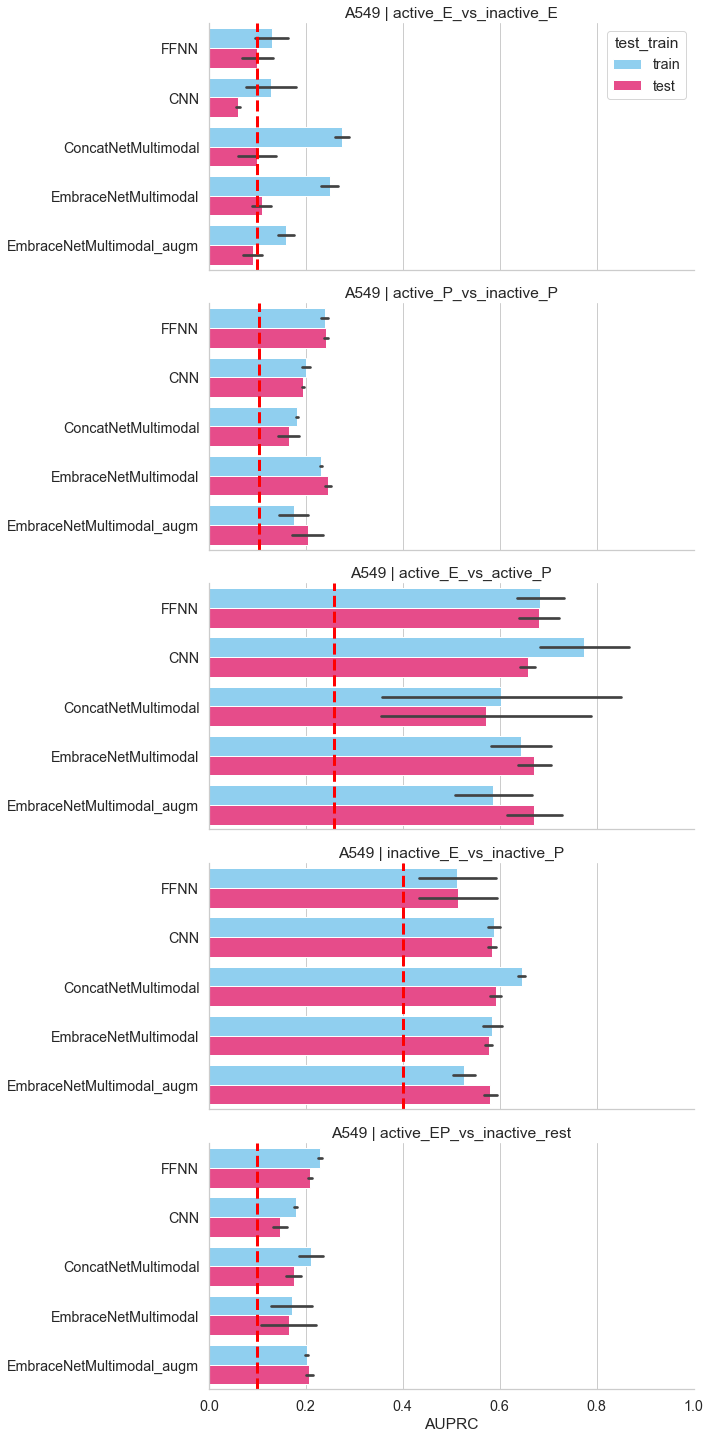

In [19]:
cell_line = CELL_LINES[0]
plot_scores(cells=cell_line, 
            models=['FFNN','CNN', 'ConcatNetMultimodal', 'EmbraceNetMultimodal','EmbraceNetMultimodal_augm'],
            palette=0)

## 2) GM12878

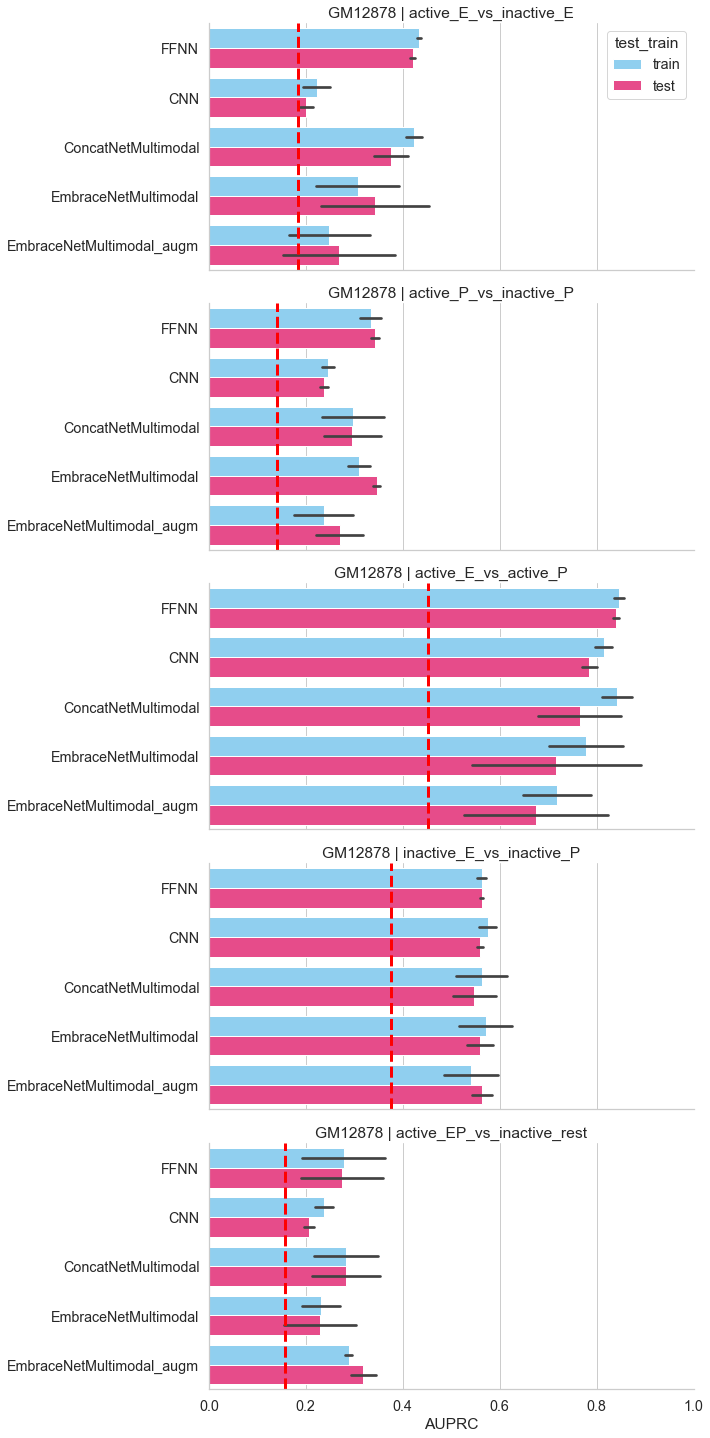

In [20]:
cell_line = CELL_LINES[1]
plot_scores(cells=cell_line, 
            models=['FFNN','CNN', 'ConcatNetMultimodal', 'EmbraceNetMultimodal','EmbraceNetMultimodal_augm'],
            palette=0)

## 3) H1

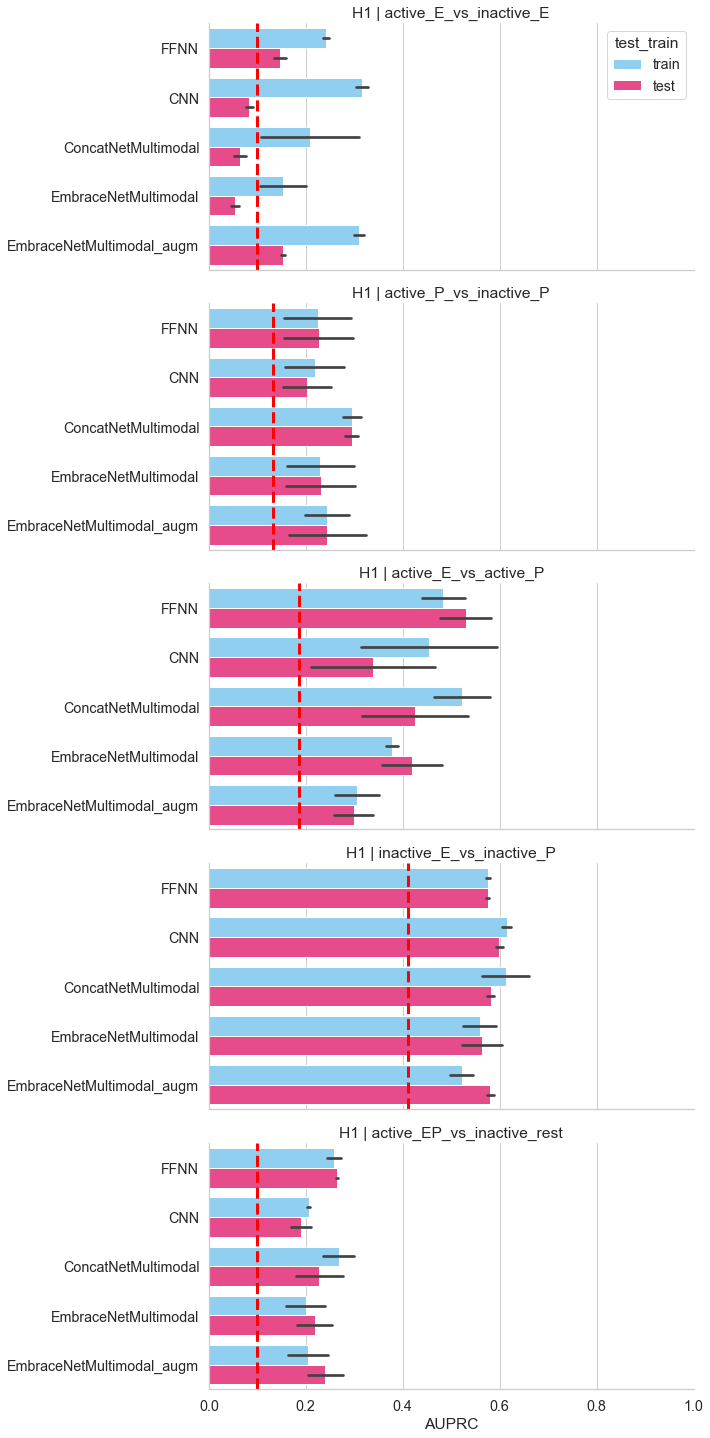

In [21]:
cell_line = CELL_LINES[2]
plot_scores(cells=cell_line, 
            models=['FFNN','CNN', 'ConcatNetMultimodal', 'EmbraceNetMultimodal','EmbraceNetMultimodal_augm'],
            palette=0)

## 4) HEK293

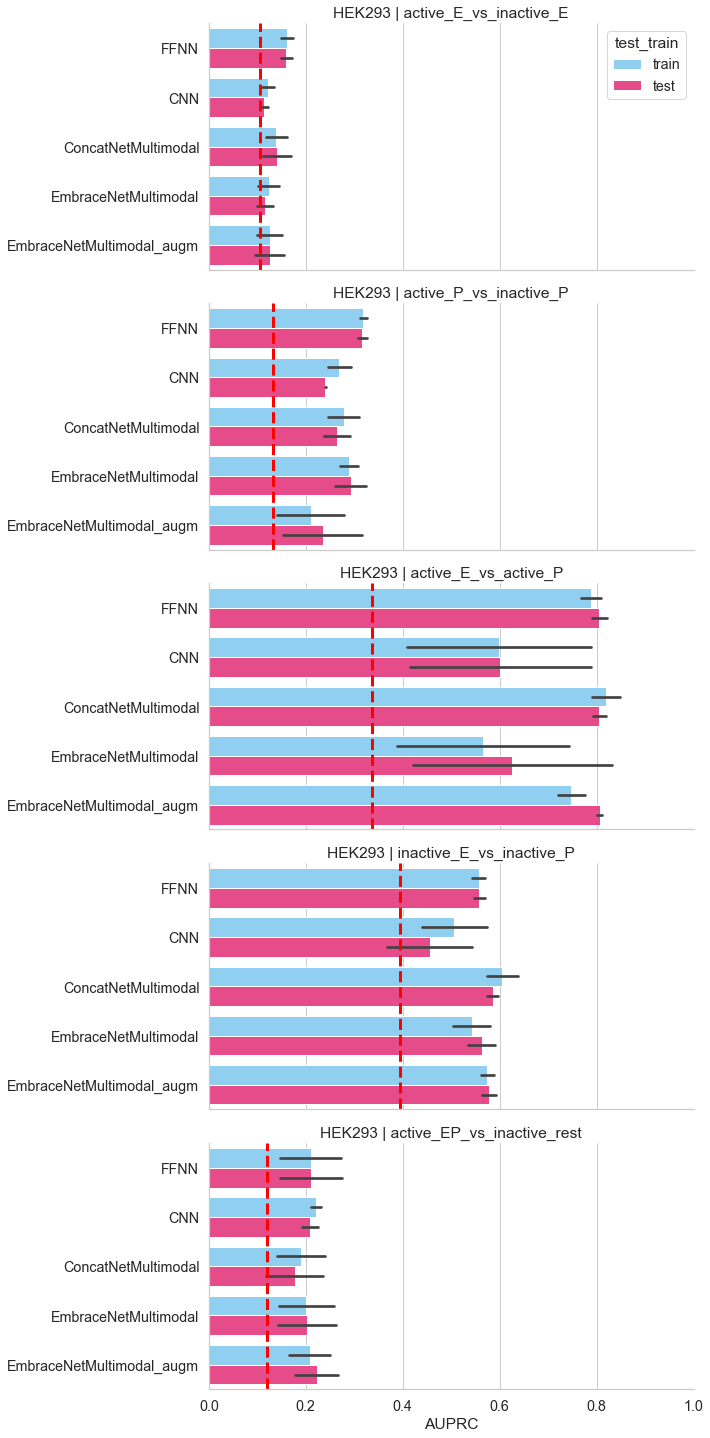

In [22]:
cell_line = CELL_LINES[3]
plot_scores(cells=cell_line, 
            models=['FFNN','CNN', 'ConcatNetMultimodal', 'EmbraceNetMultimodal','EmbraceNetMultimodal_augm'],
            palette=0)

## 5) HEPG2

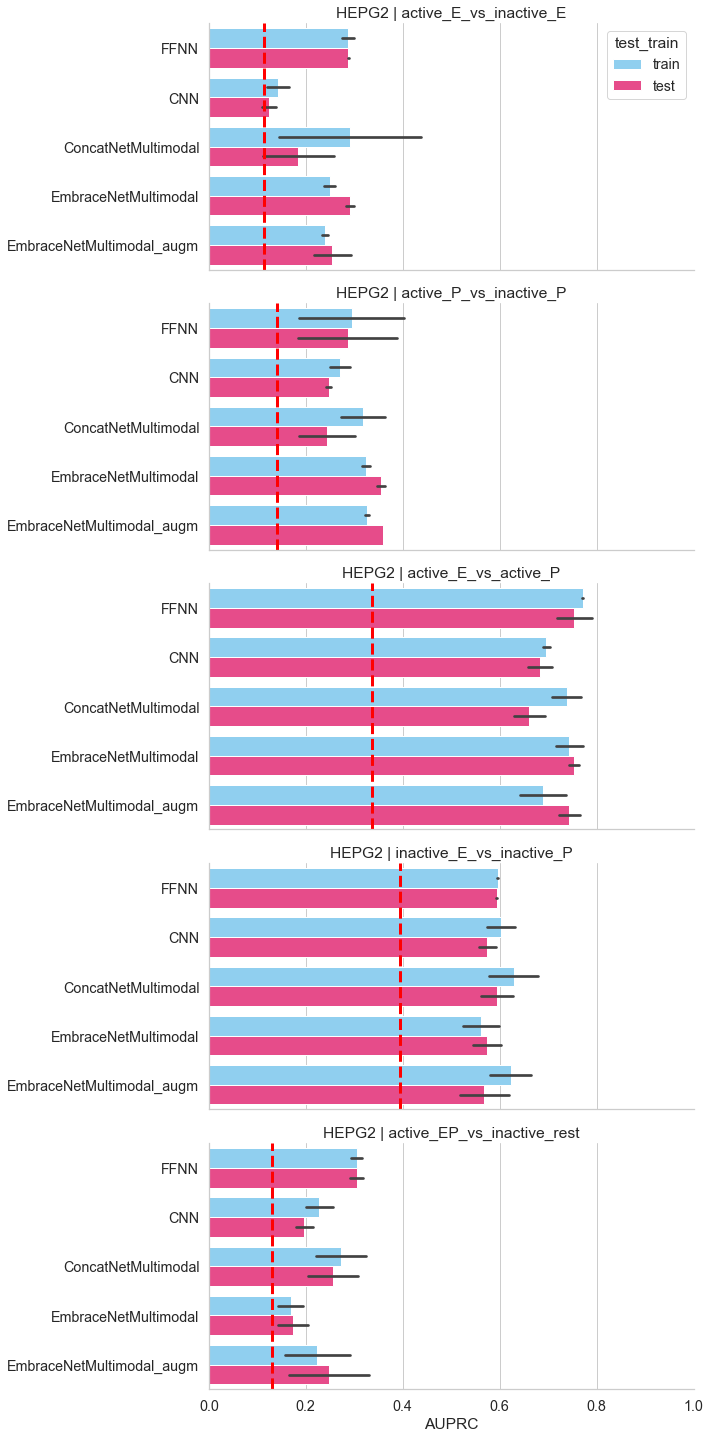

In [23]:
cell_line = CELL_LINES[4]
plot_scores(cells=cell_line, 
            models=['FFNN','CNN', 'ConcatNetMultimodal', 'EmbraceNetMultimodal','EmbraceNetMultimodal_augm'],
            palette=0)

## 6) K562

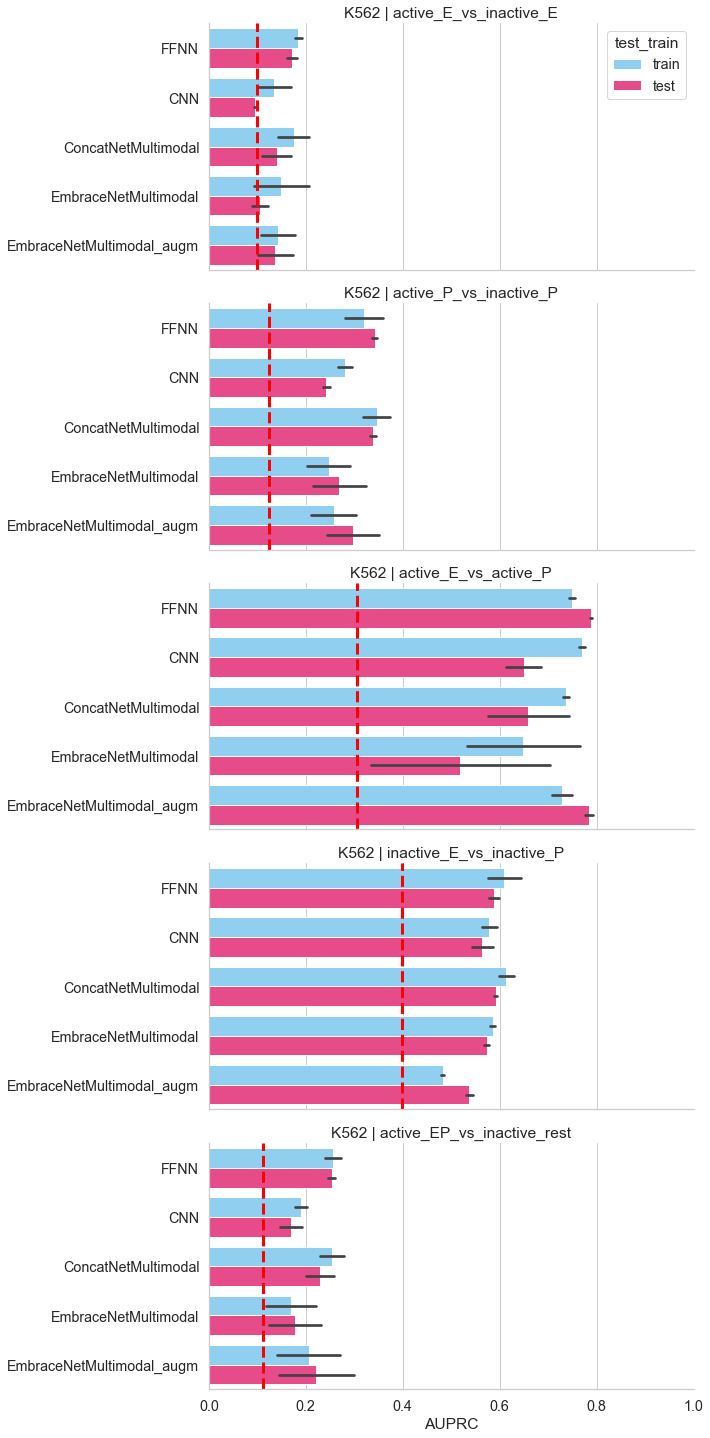

In [24]:
cell_line = CELL_LINES[5]
plot_scores(cells=cell_line, 
            models=['FFNN','CNN', 'ConcatNetMultimodal', 'EmbraceNetMultimodal','EmbraceNetMultimodal_augm'],
            palette=0)

## 7) MCF7

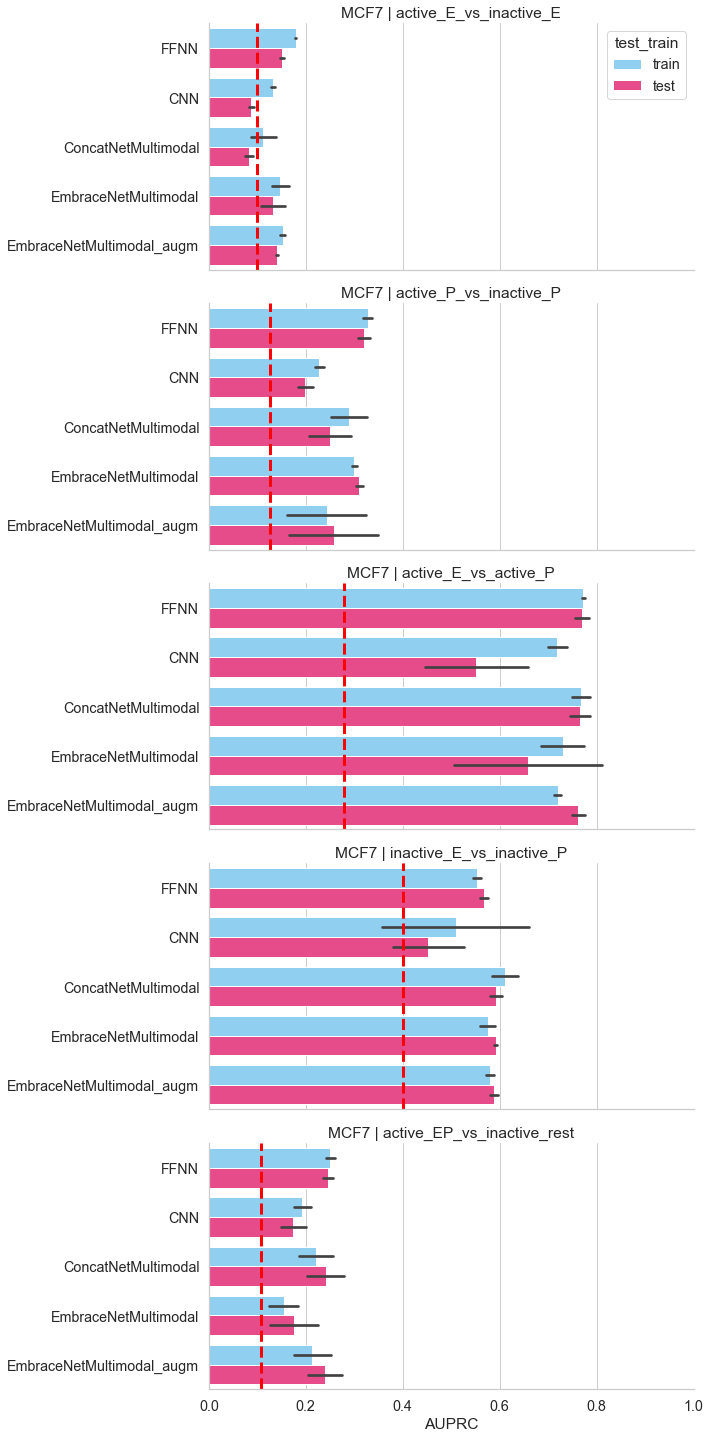

In [25]:
cell_line = CELL_LINES[6]
plot_scores(cells=cell_line, 
            models=['FFNN','CNN', 'ConcatNetMultimodal', 'EmbraceNetMultimodal','EmbraceNetMultimodal_augm'],
            palette=0)

---

In [1]:
from BIOINF_tesi.visual import Compare_Models_Result

In [ ]:
compare_models = Compare_Models_Result()
compare_models(device, tasks=TASKS, cell_lines=CELL_LINES)

In [5]:
with open (f'pval_results_dict.pickle', 'rb') as fin:
    pval_dict = pickle.load(fin)
    pval_dict = defaultdict(lambda: defaultdict(dict), pval_dict)

In [7]:
compare_models = Compare_Models_Result()
d = compare_models(device, pval_dict=pval_dict)



================ TASK: active_E_vs_inactive_E ================


A549


BASE MODEL: EmbraceNetMultimodal

FFNN ===> different: True
CNN ===> different: True
ConcatNetMultimodal ===> different: True
EmbraceNetMultimodal_augmentation ===> different: True


BASE MODEL: EmbraceNetMultimodal_augmentation

FFNN ===> different: True
CNN ===> different: True
ConcatNetMultimodal ===> different: True
EmbraceNetMultimodal ===> different: True


GM12878


BASE MODEL: EmbraceNetMultimodal

FFNN ===> different: True
CNN ===> different: True
ConcatNetMultimodal ===> different: True
EmbraceNetMultimodal_augmentation ===> different: True


BASE MODEL: EmbraceNetMultimodal_augmentation

FFNN ===> different: True
CNN ===> different: True
ConcatNetMultimodal ===> different: True
EmbraceNetMultimodal ===> different: True


H1


BASE MODEL: EmbraceNetMultimodal

FFNN ===> different: True
CNN ===> different: True
ConcatNetMultimodal ===> different: True
EmbraceNetMultimodal_augmentation ===> different: Tru

---

In [1]:
from BIOINF_tesi.visual import compare_model_overall_performance

In [7]:
df_2sided, df_1sided_greater, df_1sided_less = compare_model_overall_performance()

In [8]:
df_2sided

,EmbraceNetMultimodal,EmbraceNetMultimodal_augm
FFNN,0.0,0.009
CNN,0.0,0.0
ConcatNetMultimodal,0.484,0.332
EmbraceNetMultimodal,NaN,0.269
EmbraceNetMultimodal_augm,0.269,NaN


In [9]:
df_1sided_greater

,EmbraceNetMultimodal,EmbraceNetMultimodal_augm
FFNN,1.0,0.995
CNN,0.0,0.0
ConcatNetMultimodal,0.758,0.166
EmbraceNetMultimodal,NaN,0.134
EmbraceNetMultimodal_augm,0.866,NaN


In [10]:
df_1sided_less

,EmbraceNetMultimodal,EmbraceNetMultimodal_augm
FFNN,0.0,0.005
CNN,1.0,1.0
ConcatNetMultimodal,0.242,0.834
EmbraceNetMultimodal,NaN,0.866
EmbraceNetMultimodal_augm,0.134,NaN


---

In [8]:
r=[]
for cell in CELL_LINES:
    print(f'\n{cell}')
    for model in ['EmbraceNetMultimodal','EmbraceNetMultimodal_augmentation']:
        print(f'\n{model}')
        for task in TASKS:
            print(f'\n{task}')
            for n_iteration in range(1,4):
                print(f'\n{n_iteration}')
                state_dict = torch.load(f'{cell_line}_{model}_{task}_{n_iteration}_test_.pt', 
                                        map_location=device)
                
                state_dict = state_dict['model_params']
                for k in state_dict:
                    if k=='selection_probabilities_FFNN':
                        print(f'{state_dict[k]}')
                        r.append(state_dict[k])


A549

EmbraceNetMultimodal

active_E_vs_inactive_E

1
0.6500508706251394

2
0.5963264366225672

3
0.718616884185834

active_P_vs_inactive_P

1
0.6758293048992549

2
0.7756904153524993

3
0.6247514502852863

active_E_vs_active_P

1
0.7854148638622996

2
0.06905165754884512

3
0.44580086065269864

inactive_E_vs_inactive_P

1
0.581252600756841

2
0.7319220799763908

3
0.09437981722294886

active_EP_vs_inactive_rest

1
0.3463463138000149

2
0.016901813104996166

3
0.5635265919343754

EmbraceNetMultimodal_augmentation

active_E_vs_inactive_E

1
0.18341159791062633

2
0.20140675204233083

3
0.787125853524436

active_P_vs_inactive_P

1
0.7880896180370619

2
0.6576734854362702

3
0.7605306182620091

active_E_vs_active_P

1
0.3878019558631519

2
0.6713854154803114

3
0.5389046575619683

inactive_E_vs_inactive_P

1
0.9456487752078232

2
0.15193616784836272

3
0.30357760093828745

active_EP_vs_inactive_rest

1
0.6474892354860299

2
0.9027849502304679

3
0.721474455028037

GM12878

EmbraceNetMult

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

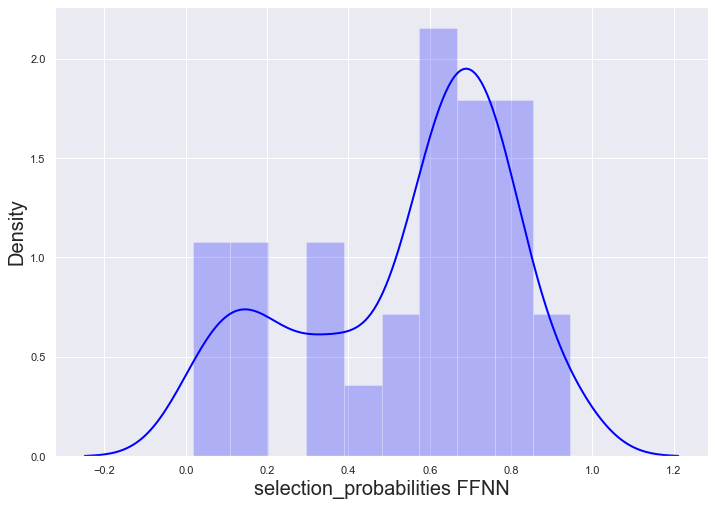

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

r = pd.Series(r, name="selection_probabilities FFNN")

sns.distplot(ax=ax, x=r, bins=10,kde=True, color='blue',
            hist_kws={"alpha": 0.25},
            kde_kws={"lw": 2})

ax.set_xlabel('selection_probabilities FFNN', size=20)
ax.set_ylabel('Density', size=20)